<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Working With Time Series Data

_Authors:_

---

### Learning Objectives
 
#### Time Series Data
**After this lesson, you will be able to:**
- Identify time series data 
- Explain the challenges of working with time series data
- Use the `DateTime` library to represent dates as objects
- Define and identify trends in time series data
- Visualize trends in time series data
- Investigate trends by computing simple aggregates with pandas with the `.resample` function
- Compute rolling statistics with pandas to compare data of a date to a smaller window of time
- Utilize exponentially weighted windows to average out noise
- Use boxplots to compare distributions
- Plot time series data over time to identify large-scale trends in data
---

### Lesson Guide

#### [Time Series Data](#py_i)
TODO
- [](#)
----

## What is a Time Series?

A series of values of a quantity obtained at successive times, often with equal intervals between them. 

A **time series** is a series of data points indexed (or listed or graphed) in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time.

A set of observations that have a time bound relation which is represented as an index.

In [2]:
TODO EXAMPLES OF TIME SERIES DATA AND THE DOMAINS THEY APPEAR IN

SyntaxError: invalid syntax (<ipython-input-2-70169bf0df80>, line 1)

In [3]:
TODO: Introduce the dataset (stock/asset prices) we will be using for our guided practice during this lesson
Google Finance might be a fine place to look for this!

SyntaxError: invalid syntax (<ipython-input-3-6518868cea74>, line 1)

## How can time series data pose issues?

In [4]:
TODO: Typically we are interested in separating the effects of time into two components: 
Trends: significant increases or decreases over time
Seasonality: regularly repeating increases or decreases
Show some examples of trends and seasonality in time series plots

SyntaxError: invalid syntax (<ipython-input-4-e2e657645fda>, line 1)

## The `DateTime` library

As time is important to time series data, we will need to interpret these data in the ways humans interpret them (which is many ways). 

Python's `DateTime` library is great for dealing with time-related data, and Pandas has incorporated this library into its own datetime series and objects.

In this lesson, we'll review these data types and learn a little more about each of them:

* Datetime objects.
* Datetime series.
* Timestamps.
* `timedelta()`.

## `datetime` Objects

Below, we load in the datetime library, which we can use to create a datetime object by entering in the different components of the date as arguments.

In [5]:
# The datetime library is something you should already have from Anaconda.
from datetime import datetime

In [6]:
# Let's just set a random datetime — not the end of the world or anything.
lesson_date = datetime(2012, 12, 21, 12, 21, 12, 844089)

The components of the date are accessible via the object's attributes.

In [6]:
print("Micro-Second", lesson_date.microsecond)
print("Second", lesson_date.second)
print("Minute", lesson_date.minute)
print("Hour", lesson_date.hour)
print("Day", lesson_date.day)
print("Month",lesson_date.month)
print("Year", lesson_date.year)

Micro-Second 844089
Second 12
Minute 21
Hour 12
Day 21
Month 12
Year 2012


## `timedelta()`

Suppose we want to add time to a date or subtract time from it. Maybe we are using time as an index and want to get everything that happened a week before a specific observation.

We can use a `timedelta` object to shift a `datetime` object. Here's an example:

In [8]:
# Import timedelta() from the datetime library.
from datetime import timedelta

# Timedeltas represent time as an amount rather than as a fixed position.
offset = timedelta(days=1, seconds=20)

# The timedelta() has attributes that allow us to extract values from it.
print('offset days', offset.days)
print('offset seconds', offset.seconds)
print('offset microseconds', offset.microseconds)

offset days 1
offset seconds 20
offset microseconds 0


Datetime's `.now()` function will give you the datetime object of this very moment.

In [10]:
now = datetime.now()
print("Like Right Now: ", now)

Like Right Now:  2018-02-08 21:11:19.199122


The current time is particularly useful when using `timedelta()`.

In [11]:
print("Future: ", now + offset)
print("Past: ", now - offset)

Future:  2018-02-09 21:11:39.199122
Past:  2018-02-07 21:10:59.199122


*Note: The largest value a `timedelta()` can hold is days. For instance, you can't say you want your offset to be two years, 44 days, and 12 hours; you have to convert those years to days.*

You can read more about the `timedelta()` category [here](https://docs.python.org/2/library/datetime.html)

## Load the UFO Reports Data

We can practice using datetime functions and objects with the UFO reports data.

In [12]:
# Get a data set from the internet.
import pandas as pd
ufo = pd.read_csv('http://bit.ly/uforeports')

In [13]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


The `Time` column starts off as an object.

In [14]:
# We can see that the Time column is just an object.
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [15]:
# Overwrite the original Time column with one that has been converted to a datetime series.
ufo['Time'] = pd.to_datetime(ufo.Time)

# Letting Pandas guess how to do this can take time; we can use a few arguments to help.
'''ufo['Time'] = pd.to_datetime(ufo.Time, format='%Y%m%d', errors='coerce')'''
# "Format" tells Pandas which format to use to interpret the date.
# "Errors" allows you to deal with errors automatically when converting.

"ufo['Time'] = pd.to_datetime(ufo.Time, format='%Y%m%d', errors='coerce')"

In [16]:
# There has been a change to the Time column' structure.
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [17]:
# We can see that the Time object has changed.  
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

## The `.dt` Attribute

Pandas' `datetime` columns have a `.dt` attribute that allows you to access attributes specific to dates. For example:

    ufo.Time.dt.day
    ufo.Time.dt.month
    ufo.Time.dt.year
    ufo.Time.dt.weekday_name

And there are many more!

In [19]:
ufo.Time.dt.weekday_name.head()

0     Sunday
1     Monday
2     Sunday
3     Monday
4    Tuesday
Name: Time, dtype: object

In [20]:
ufo.Time.dt.dayofyear.head()

0    152
1    181
2     46
3    152
4    108
Name: Time, dtype: int64

## Timestamps

Timestamps are useful objects for comparisons. You can create a timestamp object with the `pd.to_datetime()` function and a string specifying the date. These objects are especially helpful when you need to perform logical filtering with dates.

In [21]:
# Timestamp:
ts = pd.to_datetime('1/1/1999')
ts
# The main difference between a datetime object and a timestamp is
# that timestamps can be used as comparisons.

Timestamp('1999-01-01 00:00:00')

In [22]:
# Use that timestamp for a comparison.
ufo.loc[ufo.Time >= ts, :].head()

,City,Colors Reported,Shape Reported,State,Time
12832,Loma Rica,NaN,LIGHT,CA,1999-01-01 02:30:00
12833,Bauxite,NaN,NaN,AR,1999-01-01 03:00:00
12834,Florence,NaN,CYLINDER,SC,1999-01-01 14:00:00
12835,Lake Henshaw,NaN,CIGAR,CA,1999-01-01 15:00:00
12836,Wilmington Island,NaN,LIGHT,GA,1999-01-01 17:15:00


In [23]:
# We can even get the first and last dates from a time series.
ufo.Time.max() - ufo.Time.min()

Timedelta('25781 days 01:59:00')

## Trend and Seasonality

**QUESTION:** What constitutes a trend in data? Is linearity required for trend?

- A trend is any long-term change in the value we're measuring. Trends may “change direction”, going from an increasing trend to a decreasing trend.

- Trend can only be measured in the scope of the data collected; there may be trends that are unmeasureable if the data are not complete.

An example of an upward trend:
![](/assets/images/trend-line2.png)

- When patterns repeat over *known, fixed periods* of time within the data set, we call this **seasonality**.

- A seasonal pattern exists when a series is influenced by factors relating to the cyclic nature of time - i.e. time of month, quarter, year, etc. Seasonality is of a fixed and known period, otherwise it is not truly seasonality, and must be either attributed to another factor or counted as a set of anomalous events in the data.

### The easiest way to visualize trends is by drawing trend lines.

       WeekOf  Hits
0  2004-01-04    53
1  2004-01-11    53
2  2004-01-18    54
3  2004-01-25    53
4  2004-02-01    52


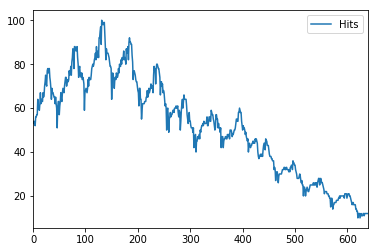

In [32]:
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt
%matplotlib inline

# Import the data
df = pd.read_csv('data/mapquest_google_trends.csv')

# Clean/Organize the data. 
df.columns = ['WeekOf', 'Hits']
print(df.head())
df.plot();

Next we need to compute a coefficient and intercept for our line. NumPy's polyfit method can do this.

Then define our polynomial function using that coefficient. We can do this on a single dimension using NumPy's `poly1d` method.

In [8]:
line_coef = np.polyfit(df.index,df['Hits'],1)
print(line_coef)

polynomial = np.poly1d(line_coef)
# The intercept is ~86.59, the slops is ~0.11
print(polynomial(0))
print(polynomial(1))

[ -0.10841388  86.58979622]
86.5897962168
86.4813823398


### Now plot our trendline over the data

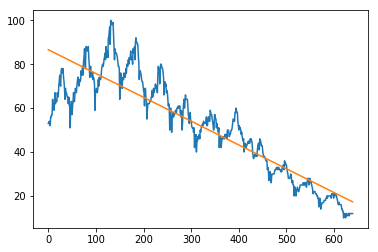

In [9]:
# Plot the time series
plt.plot(df.index, df['Hits'])
# Plot the least squares minimizing line
plt.plot(df.index, polynomial(df.index));

## Guided Practice

Let's look for trends andseasonality in data made available by a German drugstore, Rossmann.

These data contains the daily sales made at the drugstore as well as whether a sale or holiday affected the sales data.

Because we are most interested in the Date column (which contains the date of sales for each store), we will make sure to process that as a `DateTime` type, and make it the index of our dataframe.

In [10]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize'] = (16.0, 8.0)

data = pd.read_csv('data/rossmann.csv', skipinitialspace=True, low_memory=False)
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')
data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


This allows us to easily filter by date.

In [11]:
data['Year'] = data.index.year
data['Month'] = data.index.month

data['2015-05'].head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
Date,,,,,,,,,,
2015-05-31,1,7,0,0,0,0,0,0,2015,5
2015-05-31,2,7,0,0,0,0,0,0,2015,5
2015-05-31,3,7,0,0,0,0,0,0,2015,5
2015-05-31,4,7,0,0,0,0,0,0,2015,5
2015-05-31,5,7,0,0,0,0,0,0,2015,5


There are over a million sales data points in this dataset, so for some simple EDA we will focus on just one store.

In [12]:
store1_data = data[data['Store'] == 1]
store1_data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
Date,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7
2015-07-30,1,4,5020,546,1,1,0,1,2015,7
2015-07-29,1,3,4782,523,1,1,0,1,2015,7
2015-07-28,1,2,5011,560,1,1,0,1,2015,7
2015-07-27,1,1,6102,612,1,1,0,1,2015,7


### Plotting the sales data

We want to know how sales change over time, and whether promotions or holidays affect sales. To start, we can compare the average sales on those events.

To compare sales on holidays, we'll use boxplots.

On state holidays the store is closed (which means there are 0 sales) -- so we need to cut those days out. (Contextual knowledge like this is always needed to truly explain time series phenomenon.)

> Check: can you think of any other special considerations we should make when tracking sales?

Now check to see if there is a difference affecting sales on promotion days.

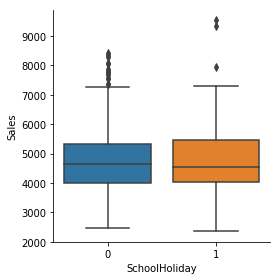

In [13]:
sns.factorplot(
    x='SchoolHoliday',
    y='Sales',
    data=store1_data[store1_data['Open']==1],
    kind='box'
);

We can see that there _is_ a difference in sales on promotion days.

Why is it important to separate out days where the store is closed? Because there aren't any promotions on those days either, so including them will bias your sales data on days without promotions! Remember to think about the business logic as well as analyzing the raw data.

We may also want to compare sales across days of the week:

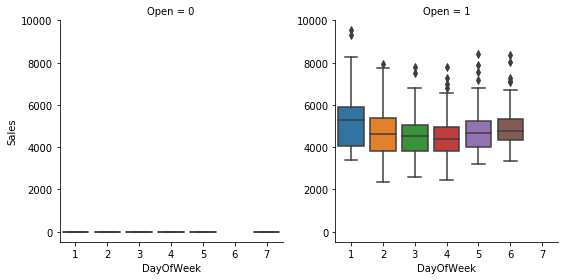

In [14]:
sns.factorplot(
    col='Open',
    x='DayOfWeek',
    y='Sales',
    data=store1_data,
    kind='box',
);

Lastly, we want to identify larger-scale trends in our data. How did sales change from 2014 to 2015? Were there any particularly interesting outliers in terms of sales or customer visits?

To plot the sales and customer visits over time:

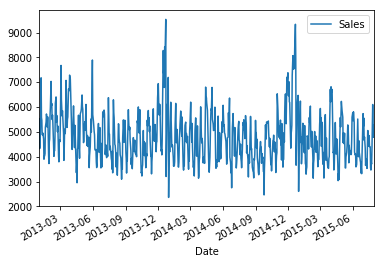

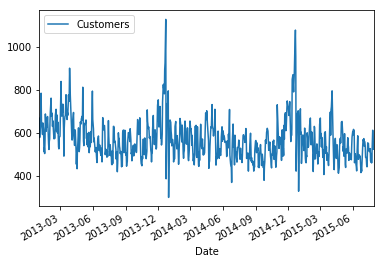

In [48]:
# Filter to days store 1 was open
store1_open_data = store1_data[store1_data['Open']==1]
store1_open_data[['Sales']].plot()
store1_open_data[['Customers']].plot()

We can see that there are large spikes of sales and customers towards the end of 2013 and 2014, leading into the first quarter of 2014 and 2015.

Let's use the index filtering to filter just to 2015 changes over time. This should make it easier to identify the holiday sales bump.

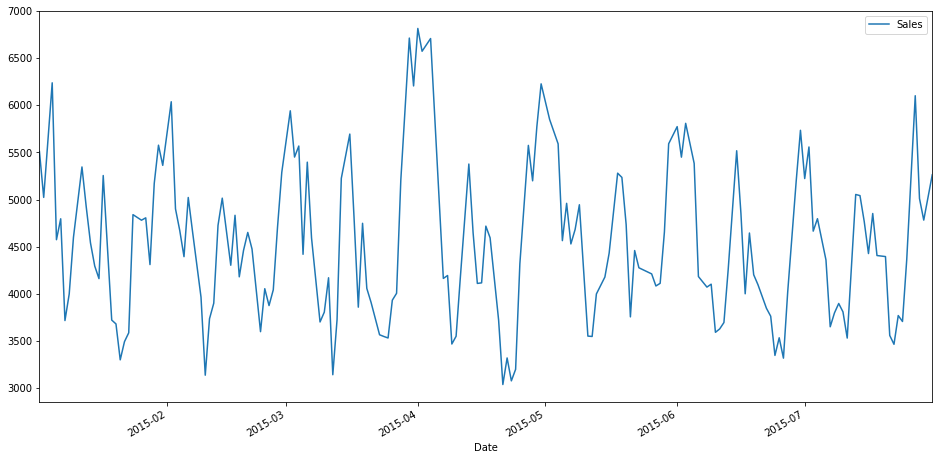

In [38]:
store1_data_2015 = store1_data['2015']
store1_data_2015[
    store1_data_2015.Open==1
][['Sales']].plot();

## Aggregates of sales over time

If we want to investigate trends over time in sales, as always, we will start by computing simple aggregates. We want to know: what were the mean and median sales in each month and year?

We can use `data.resample` on the whole dataset and provide as arguments:
    - The level on which to roll-up to, 'D' for day, 'W' for week, 'M' for month, 'A' for year
    - The aggregation to perform: 'mean', 'median', 'sum', etc.

In [39]:
data[['Sales']].resample('A', how=['median', 'mean'])

/Users/nicholebennett/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  """Entry point for launching an IPython kernel.


Sales             
           median         mean
Date                          
2013-12-31   5598  5658.533675
2014-12-31   5794  5833.290704
2015-12-31   5916  5878.245380

In [40]:
# December 2013 and 2014 were the highest average sale months.
data[['Sales']].resample('M', how=['median', 'mean'])\
.sort_values(by=('Sales','mean'), ascending=False).head()

/Users/nicholebennett/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  


Sales             
            median         mean
Date                           
2014-12-31  6915.0  6973.282456
2013-12-31  6566.0  6703.618140
2015-06-30  6042.0  6199.203976
2014-11-30  6337.5  6179.249661
2015-07-31  6085.0  6142.705511

## Rolling Statistics

With time series, we can "roll" statistics across time. For example, the rolling mean is the mean of a moving window across time periods. Pandas offers a variety of functionalities for creating rolling statistics, which we'll only scratch the surface of here.

E.g. to understand holidays sales, we don't want to compare sales data in late December with the entire month, but to a few days immediately surrounding it. We can do this using rolling averages.

The syntax for these can be a little tricky at first. We'll be using a `rolling()` function with a statistical function chained to it. Let's dive into more detail.

### Parameters for `rolling()` Functions
`rolling().mean()` (as well as `rolling().median())` can take the following parameters:

* The first indicates the time series to aggregate.
* `window` indicates the number of days to include in the average.
* `center` indicates whether the window should be centered on the date or use data prior to that date.
* `freq` indicates which level to roll the averages up to (as used in `resample`): `D` for day, `M` for month, `A` for year, etc.

*Note: For more information, see Pandas' [resample documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html).*

#### Calculate the rolling daily sum over all stores

In [24]:
# Resample to have the daily total over all stores
daily_store_sales = data[['Sales']].resample('D').sum()
daily_store_sales.rolling( window=3, center=True).mean().head()

,Sales
Date,
2013-01-01,NaN
2013-01-02,4.464961e+06
2013-01-03,6.645534e+06
2013-01-04,6.312789e+06
2013-01-05,4.244817e+06


We can use our index filtering to just look at 2015.

In [27]:
daily_store_sales.rolling( window=3, center=True).mean()['2015'].head()

,Sales
Date,
2015-01-01,3.862395e+06
2015-01-02,4.613968e+06
2015-01-03,4.636312e+06
2015-01-04,5.883770e+06
2015-01-05,6.097493e+06


Instead of plotting the full time series, we can plot the rolling mean instead, which smooths random changes in sales as well as removing outliers, helping us identify larger trends.

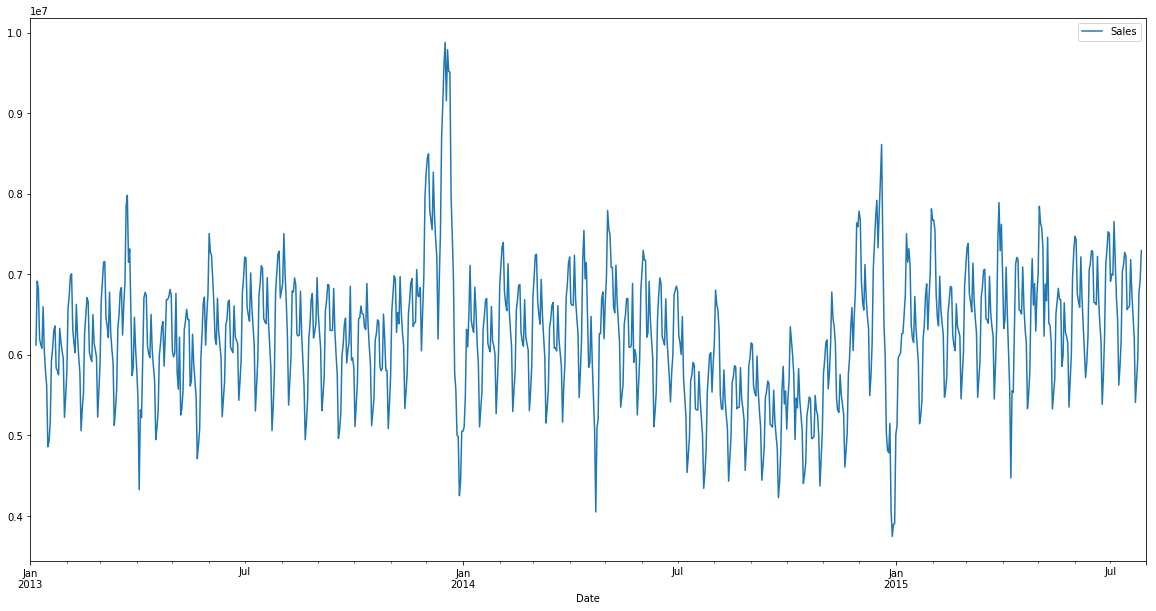

In [29]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
daily_store_sales.rolling( window=10, center=True).mean().plot()

## The expanding mean

The "expanding mean" simply uses all data points up to the current time to calculate the mean, as opposed to a moving window.

#### Calculate and plot the expanding mean below. Resample by quarter.

In [34]:
rolling_mean = data.Sales.resample('Q').sum().rolling(window=1, center=False).mean()
expanding_mean = data.Sales.resample('Q').sum().expanding().mean()

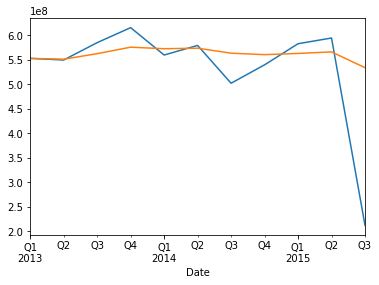

In [36]:
rolling_mean.plot()
expanding_mean.plot()

## Exponentionally weighted windows

Exponentially weighted windows are one of the most common and effective ways of averaging out noise in time series data. The averaging is done with an "exponential decay" on the contribution of prior means, decreasing the contribution of time points that are further in the past.

The (adjusted) exponentially weighted mean for time, $t$, is defined as:

<a id="-xt--fracxt-----alphaxt------alphaxt--------alphatx------alpha-----alpha-------alphat-"></a>
### $$ x_t = \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2x_{t-1} + ... + (1 - \alpha)^{t}x_0} {1 + (1 - \alpha) + (1 - \alpha)^2 + ... + (1 - \alpha)^{t}} $$

> **Note:** Review Pandas' [documentation](http://pandas.pydata.org/pandas-docs/stable/computation.html#exponentially-weighted-windows) for more information.

**Calculate and plot the exponentially weighted sum along with the rolling sum. What is the difference?**

For example: `.resample('Q').sum().ewm(span=10).mean()`.

In [39]:
rolling_mean = data.Sales.resample('Q').sum().rolling(window=2, center=True).mean()
exp_weighted_mean = data.Sales.resample('Q').sum().ewm(span=10).mean()

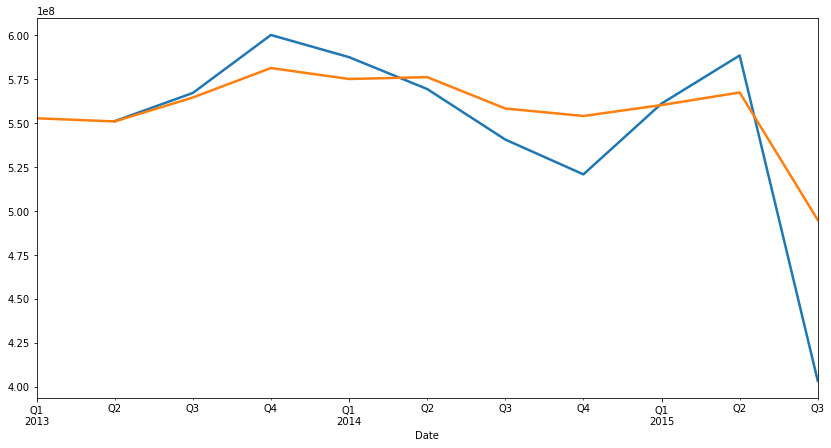

In [40]:
ax = rolling_mean.plot(lw=2.5, figsize=(14,7))
exp_weighted_mean.plot(ax=ax, lw=2.5)

## "Differencing" a Time Series and Stationarity

If a time series is stationary, the mean, variance, and autocorrelation (covered in the next section) will be constant over time. Forecasting methods typically assume the time series you are forecasting on to be stationary — or at least approximately stationary.

The most common way to make a time series stationary is through "differencing." This procedure converts a time series into the difference between values.

<a id="-delta-yt--yt---yt--"></a>
### $$ \Delta y_t = y_t - y_{t-1} $$

This removes trends in the time series and ensures that the mean across time is zero. In most cases, this only requires a single difference, although, in some cases, a second difference (or third, etc.) will be necessary to remove trends.

In [46]:
store1_data['Sales_diff'] = store1_data['Sales'].diff(periods = 7)

/Users/nicholebennett/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


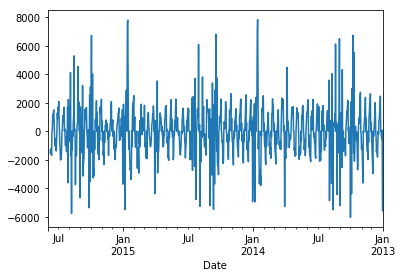

In [47]:
store1_data['Sales_diff'].plot()

# Independent Practice

1. Plot the distribution of sales by month and compare the effect of promotions.
2. Plot the 15 day rolling mean of customers in the stores.
3. Identify the date with largest drop in sales from the same date in the previous month.
4. Compute the total sales up until Dec. 2014.
5. When were the largest differences between 15-day moving/rolling averages? HINT: Using `rolling_mean` and `diff`

1. Plot the distribution of sales by month and compare the effect of promotions

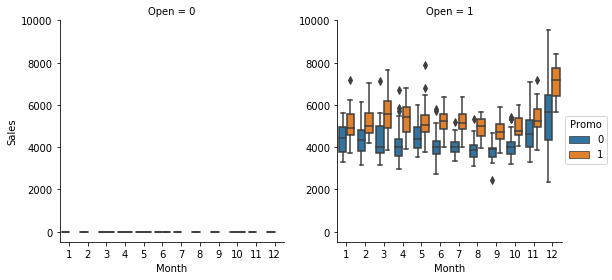

In [53]:
sns.factorplot(
    col='Open',
    hue='Promo',
    x='Month',
    y='Sales',
    data=store1_data,
    kind='box'
)

Plot the 15 day rolling mean of customers in the stores.

In [54]:
pd.rolling_mean(data[['Sales']], window=15, freq='D').plot()

/Users/nicholebennett/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:6195: FutureWarning: The freq kw is deprecated and will be removed in a future version. You can resample prior to passing to a window function
  on=on, axis=axis, closed=closed)
/Users/nicholebennett/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=15,freq=D,center=False).mean()
  """Entry point for launching an IPython kernel.


ValueError: cannot reindex from a duplicate axis

Identify the date with largest drop in sales from the same date in the previous month.

In [56]:
average_daily_sales = data[['Sales', 'Open']].resample('D', how='mean')
average_daily_sales['DiffVsLastWeek'] = average_daily_sales[['Sales']].diff(periods=7)

average_daily_sales.sort(['DiffVsLastWeek']).head
# Unsurprisingly, this day is Dec. 25 and Dec. 26 in 2014 and 2015, when the store is closed and there are many sales in the preceding week. How about when the store is open?

average_daily_sales[average_daily_sales.Open == 1].sort(['DiffVsLastWeek'])
# The top values are Dec. 24th, but sales on 2013-12-09 and 2013-10-14 were on average 4k lower than the same day in the previous week.

/Users/nicholebennett/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """Entry point for launching an IPython kernel.


AttributeError: 'DataFrame' object has no attribute 'sort'

Compute the total sales up until Dec. 2014.

In [ ]:
total_daily_sales = data[['Sales']].resample('D', how='sum')
pd.expanding_sum(total_daily_sales)['2014-12']
# Note that this is NOT

pd.expanding_sum(data['Sales'])['2014-12']
# because we do not want to sum over our stores first.

When were the largest differences between 15-day moving/rolling averages? HINT: Using `rolling_mean` and `diff`

In [ ]:
pd.rolling_mean(total_daily_sales, window=15).diff(1).sort('Sales')
# Unsurprisingly, they occur at the beginning of every year after the holiday season.

## Recap
- We use time series analysis to identify changes in values over time
- We want to identify whether changes are true trends, seasonal changes or something else
- Rolling means give us a local statistic of an average in time, smoothing out random fluctuations and removing outliers